# Customized Matplotlib Color Maps

In this section are some functions that create matplotlib color maps based on chosed theme colors.

In [5]:
# First, load the codes that convert between RGB and HSL codes
!curl -O https://raw.githubusercontent.com/Leejere/python-visualization-preset/main/convert_colors.ipynb

%run convert_colors.ipynb

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 10665  100 10665    0     0  95841      0 --:--:-- --:--:-- --:--:-- 96954


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

## Sequential color maps

First, let's create a monochromatic sequential color map based off of a theme color and transitioning towards white, black, or transparent. Note that sometimes, we want a color map that is not entirely uniform in hue. We can take an additional hue into the function.

In [7]:
# Inputs:
# theme_color: string, hex: the main color that this cmap is based on
# aux_color: hue at the other end of the color map. Takes either a string(hex) or a number(other hex); if not, default to same
# end_saturation (optional): "same", "down", "gray", "as aux" (same as aux color) or integer (pct)
# end_lightness: integer (pct); black if 0, white if 100; or "same" "as aux"
# end_alpha: number(transparency 0-1)
# invert: True, False
def create_mono_cmap(theme_color, aux_color = 'same', end_saturation = 'same', end_lightness = 100, end_alpha = 1, invert = False):
    
    # First, convert this color into HSL
    this_h, this_s, this_l = [i for i in hex_to_hsl(theme_color)] # this_s, this_l: 0-100
    this_a = 1. # Starting alpha is 1.
      
    # Get end HSL
    # Keep hue same
    if aux_color == 'same':
        end_h = this_h
        aux_h, aux_s, aux_l = [i for i in hex_to_hsl(theme_color)] # aux_s, aux_l: 0-100
    elif type(aux_color) == str:
        end_h = hex_to_hsl(aux_color)[0]
        aux_h, aux_s, aux_l = [i for i in hex_to_hsl(aux_color)] # aux_s, aux_l: 0-100
    else:
        end_h = int(aux_color)
        
    
    # Saturation (0-100)
    if end_saturation == 'same':
        end_s = this_s
    elif end_saturation == 'down':
        end_s = this_s / 2
    elif end_saturation == 'gray':
        end_s = 0
    elif end_saturation == 'as aux':
        end_s = aux_s
    elif end_saturation <= 100 & end_saturation >= 0:
        end_s = end_saturation
    else:
        print('end_saturation input error')
    
    # Lightness (0-100)
    if end_lightness == 'same':
        end_l = this_l
    elif end_lightness == 'as aux':
        end_l = aux_l
    elif end_lightness >= 0 & end_lightness <= 100:
        end_l = end_lightness
    else:
        print('end_lightness input error')
    
    # Alpha
    if end_alpha >= 0 & end_alpha <= 1:
        end_a = end_alpha
    else:
        print('end_alpha input error')
    
    # Now we'll convert the hsl's into rgb's
    this_r, this_g, this_b = [i for i in hsl_to_rgb(this_h, this_s, this_l)]
    end_r, end_g, end_b = [i for i in hsl_to_rgb(end_h, end_s, end_l)]
    
    if invert == True:
        # Sway this and end
        temp_r, temp_g, temp_b = this_r, this_g, this_b
        this_r, this_g, this_b = end_r, end_g, end_b
        end_r, end_g, end_b = temp_r, temp_g, temp_b
    
    # Create color map
    cmap_array = np.ones((256, 4)) # Create a two-dimensional np.array
    cmap_array[:, 0] = np.linspace(this_r / 255, end_r / 255, 256) # Red
    cmap_array[:, 1] = np.linspace(this_g / 255, end_g / 255, 256) # Green
    cmap_array[:, 2] = np.linspace(this_b / 255, end_b / 255, 256) # Blue
    cmap_array[:, 3] = np.linspace(this_a, end_a, 256) # Alpha
    
    return ListedColormap(cmap_array)

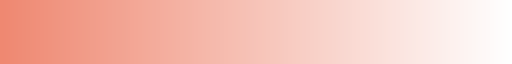

In [8]:
# Demonstrate
create_mono_cmap(theme_color = '#EF8872')

## Diverging color maps

Based on the above code, it is easy to define another function that creates diverging color maps.

In [71]:
# Inputs:
# end_color_1, end_color_2: string, two colors at the ends of the color map

# mid_pos: position (number, 0-1) of the change of hue; color_1 transitions into mid_pos, and from mit_pos the color transitions into color_2
# mid_method: "white", "black", "transparent"
# mid_alpha: numeric 0-1

def create_div_cmap(end_color_1, end_color_2, mid_pos = 0.5, mid_method = "white", mid_alpha = 1):
    
    # Get rgb of end_color_1 and end_color_2
    # N.B. Result needs to be divided by 255
    end_r_1, end_g_1, end_b_1 = [i / 255 for i in hex_to_rgb(end_color_1)]
    end_r_2, end_g_2, end_b_2 = [i / 255 for i in hex_to_rgb(end_color_2)]
    
    end_alpha_1 = 1
    end_alpha_2 = 1
    
    # Now calculate the middle color
    # We use TWO mid colors. Although there is only one mid point, we use two mid colors to transtion with their own corresponding theme color
    # When mid_method == "white" or "black" the two mid colors are the same
    
    if mid_method == "white":
        mid_r_1, mid_g_1, mid_b_1 = [1., 1., 1.]
        mid_r_2, mid_g_2, mid_b_2 = [1., 1., 1.]
    elif mid_method == "black":
        mid_r_1, mid_g_1, mid_b_1 = [0., 0., 0.]
        mid_r_2, mid_g_2, mid_b_2 = [0., 0., 0.]
    elif mid_method == "alpha":
        mid_r_1, mid_g_1, mid_b_1 = end_r_1, end_g_1, end_b_1
        mid_r_2, mid_g_2, mid_b_2 = end_r_2, end_g_2, end_b_2
        mid_alpha = 0
    
    # find the length of two halves
    left_length = int(mid_pos * 255)
    right_length = 256 - left_length
    
    # Create left half
    left_array = np.ones((left_length, 4))
    left_array[:, 0] = np.linspace(end_r_1, mid_r_1, left_length) # Red
    left_array[:, 1] = np.linspace(end_g_1, mid_g_1, left_length) # Green
    left_array[:, 2] = np.linspace(end_b_1, mid_b_1, left_length) # Blue
    left_array[:, 3] = np.linspace(end_alpha_1, mid_alpha, left_length) # Alpha
       
    # Create right half
    right_array = np.ones((right_length, 4))
    right_array[:, 0] = np.linspace(mid_r_2, end_r_2, right_length) # Red
    right_array[:, 1] = np.linspace(mid_g_2, end_g_2, right_length) # Green
    right_array[:, 2] = np.linspace(mid_b_2, end_b_2, right_length) # Blue
    right_array[:, 3] = np.linspace(mid_alpha, end_alpha_2, right_length) # Alpha
    
    # Create final
    cmap_array = np.vstack((left_array, right_array))
    
    return ListedColormap(cmap_array)

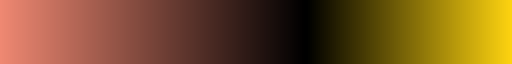

In [76]:
create_div_cmap(end_color_1 = '#EF8872',
                end_color_2 = '#FDD310',
                mid_pos = 0.6,
                mid_method = "black")